In [13]:
import tensorflow as tf

from keras import layers, optimizers, losses, models

import numpy as np

In [8]:
# Simple Q&A model architecture with mutliple inputs
# we'll have a question and possible answer as a input
# then the model will have an output as generated answer

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = layers.Input(shape = (None,),
                          name = 'text')

embedded_text = layers.Embedding(text_vocabulary_size,
                                 64)(text_input)

encoded_text = layers.LSTM(32)(embedded_text)

question_input = layers.Input(shape=(None,),
                              name = 'question')

embedded_question = layers.Embedding(question_vocabulary_size,
                                     32)(question_input)

encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question],
                                  axis = -1)

# now add the final classifier with softmax layer
answer = layers.Dense(answer_vocabulary_size,
                      activation = 'softmax')(concatenated)

model = models.Model([text_input, question_input], answer)

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

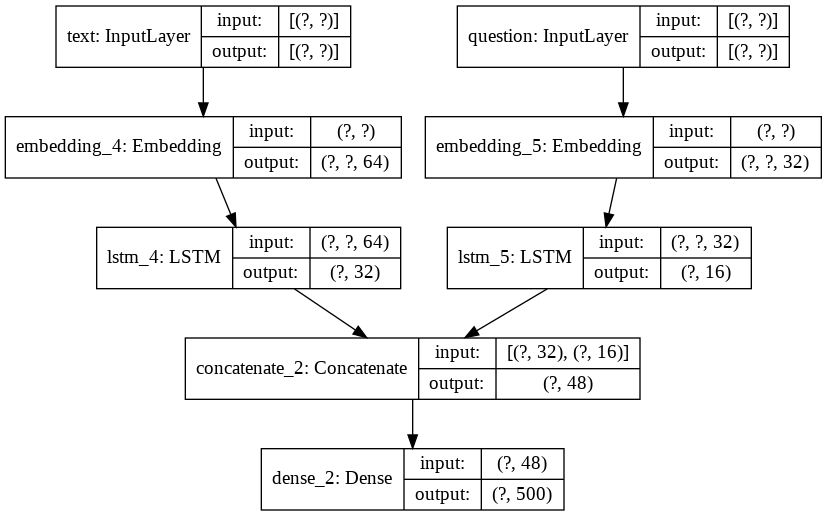

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [9]:
import numpy as np

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size,
                         size = (num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size,
                         size = (num_samples, max_length))
answers = np.random.randint(0, 1,
                         size = (num_samples, answer_vocabulary_size))


In [11]:
# if you gave a name to input layers you can use dictionary to 
# # pass the data:
# model.fit({'text': text, 'question': question}, answers, epochs = 10,
#           batch_size = 128)
# or you can pass it in a list (in order of course)
model.fit([text, question], answers, epochs = 10, batch_size = 128)

Epoch 1/10
8/8 [==============================] - 1s 98ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 1s 98ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 1s 97ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 1s 99ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 1s 109ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 1s 96ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 1s 97ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 8/10
8/8 [==============================] - 1s 95ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 9/10
8/8 [==============================] - 1s 104ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 10/10
8/8 [==============================] - 1s 96ms/step - loss: 0.0000e+00 - acc: 0.0000e+